## The problem in this data set is to try and figure out what are the major reason for delays at airports. My goal is to figure out what the major variables that cause delays and to make recommendations on what they can do to improve their airports.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
cancellations= pd.read_csv('assets/airport_cancellations.csv')
operations= pd.read_csv('assets/Airport_operations.csv')
airports= pd.read_csv('assets/airports.csv')

In [3]:
cancellations.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


In [4]:
operations.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [5]:
operations['Airport']=operations['airport']
operations['Year']=operations['year']

In [6]:
operations.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Airport,Year
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87,ABQ,2004
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24,ABQ,2005
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82,ABQ,2006
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71,ABQ,2007
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48,ABQ,2008


In [7]:
ap_merge1=pd.merge(cancellations, operations, how='outer', on=['Airport', 'Year'])

In [8]:
ap_merge1.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,airport,year,departures for metric computation,arrivals for metric computation,...,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004.0,242.0,235.0,71.0,46.0,ABQ,2004.0,53971.0,53818.0,...,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005.0,221.0,190.0,61.0,33.0,ABQ,2005.0,51829.0,51877.0,...,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006.0,392.0,329.0,71.0,124.0,ABQ,2006.0,49682.0,51199.0,...,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007.0,366.0,304.0,107.0,45.0,ABQ,2007.0,53255.0,53611.0,...,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008.0,333.0,300.0,79.0,42.0,ABQ,2008.0,49589.0,49512.0,...,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [9]:
ap_merge1.drop(['year', 'airport', ], axis=1, inplace=True)

In [10]:
airport_info=ap_merge1.dropna()

In [11]:
no_year_airport=airport_info.drop(['Airport','Year'], axis=1)

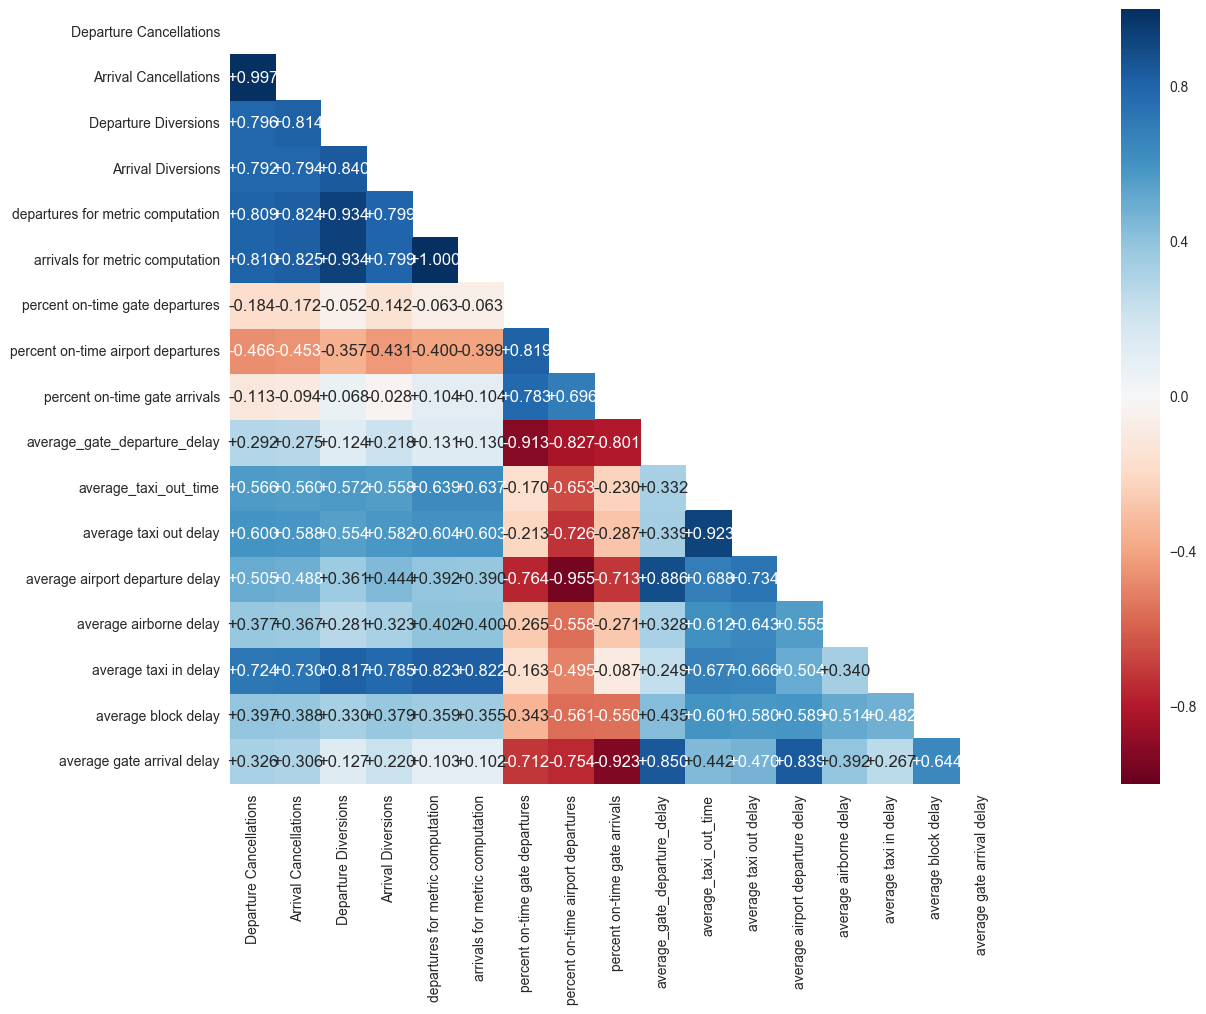

In [12]:
plt.figure(figsize=(30,10))
corr = no_year_airport.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks()

In [159]:
airport_info.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004.0,242.0,235.0,71.0,46.0,53971.0,53818.0,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005.0,221.0,190.0,61.0,33.0,51829.0,51877.0,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006.0,392.0,329.0,71.0,124.0,49682.0,51199.0,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007.0,366.0,304.0,107.0,45.0,53255.0,53611.0,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008.0,333.0,300.0,79.0,42.0,49589.0,49512.0,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
cols=no_year_airport.columns

In [162]:
airport_scaled=StandardScaler().fit_transform(no_year_airport)

In [163]:
airport_scaled

array([[-0.57471319, -0.55884073, -0.59844728, ..., -0.68388851,
        -0.7493269 , -0.7874207 ],
       [-0.58612795, -0.58157695, -0.6564081 , ..., -0.61364466,
        -0.96173661, -0.98129006],
       [-0.49317926, -0.51134727, -0.59844728, ..., -0.6721812 ,
        -0.63806466, -0.49507802],
       ..., 
       [-0.64265814, -0.62351266, -0.78971799, ..., -0.78925429,
        -1.01231036, -0.85819841],
       [-0.61113168, -0.60027119, -0.65061202, ..., -0.83608352,
        -0.82013014, -0.20581264],
       [-0.60950101, -0.59926069, -0.69118459, ..., -0.57852273,
        -0.7290974 ,  0.40964564]])

In [164]:
from sklearn.decomposition import PCA

In [165]:
pca=PCA(n_components=2)
airport_pca=pca.fit_transform(airport_scaled)

In [166]:
sum(pca.explained_variance_ratio_)

0.78366006989083714

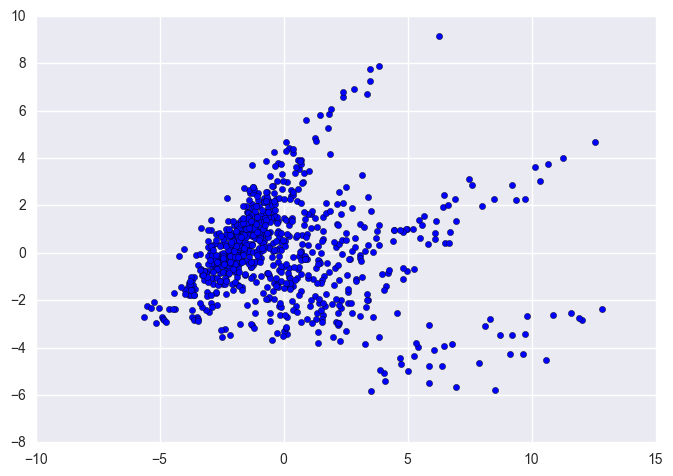

In [167]:
plt.scatter(airport_pca.T[0], airport_pca.T[1])

In [168]:
from sklearn.manifold import TSNE

In [169]:
tsne=TSNE(n_components=2)
tsne2=tsne.fit_transform(airport_pca)

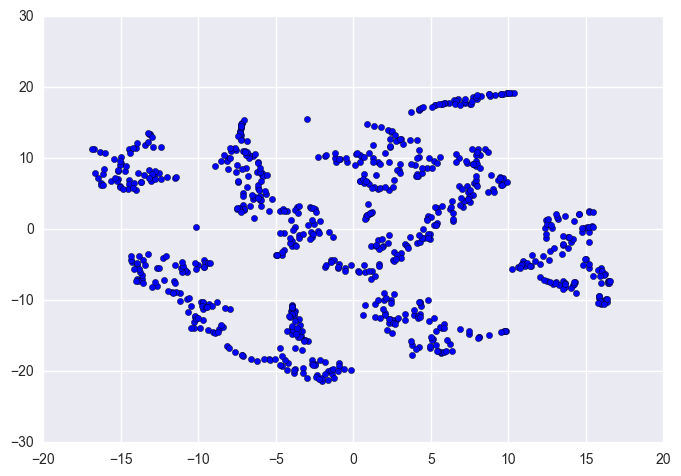

In [171]:
plt.scatter(tsne2[:,0], tsne2[:,1])

In [172]:
pca2=PCA(n_components=2)
airport_pca2=pca.fit_transform(tsne2)

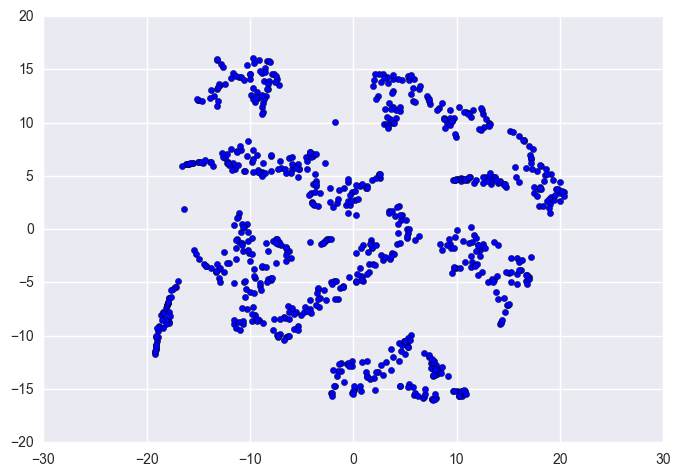

In [173]:
plt.scatter(airport_pca2.T[0], airport_pca2.T[1])

In [39]:
airport_info.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004.0,242.0,235.0,71.0,46.0,53971.0,53818.0,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005.0,221.0,190.0,61.0,33.0,51829.0,51877.0,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006.0,392.0,329.0,71.0,124.0,49682.0,51199.0,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007.0,366.0,304.0,107.0,45.0,53255.0,53611.0,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008.0,333.0,300.0,79.0,42.0,49589.0,49512.0,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [127]:
average=airport_info.drop(['Airport','Year', 'Departure Cancellations', 'Arrival Cancellations',
                          'Departure Diversions', 'Arrival Diversions', 'departures for metric computation',
                          'arrivals for metric computation', 'percent on-time gate departures',
                          'percent on-time airport departures', 'percent on-time gate departures',
                          'percent on-time gate arrivals'], axis=1)

In [128]:
average.head()

,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


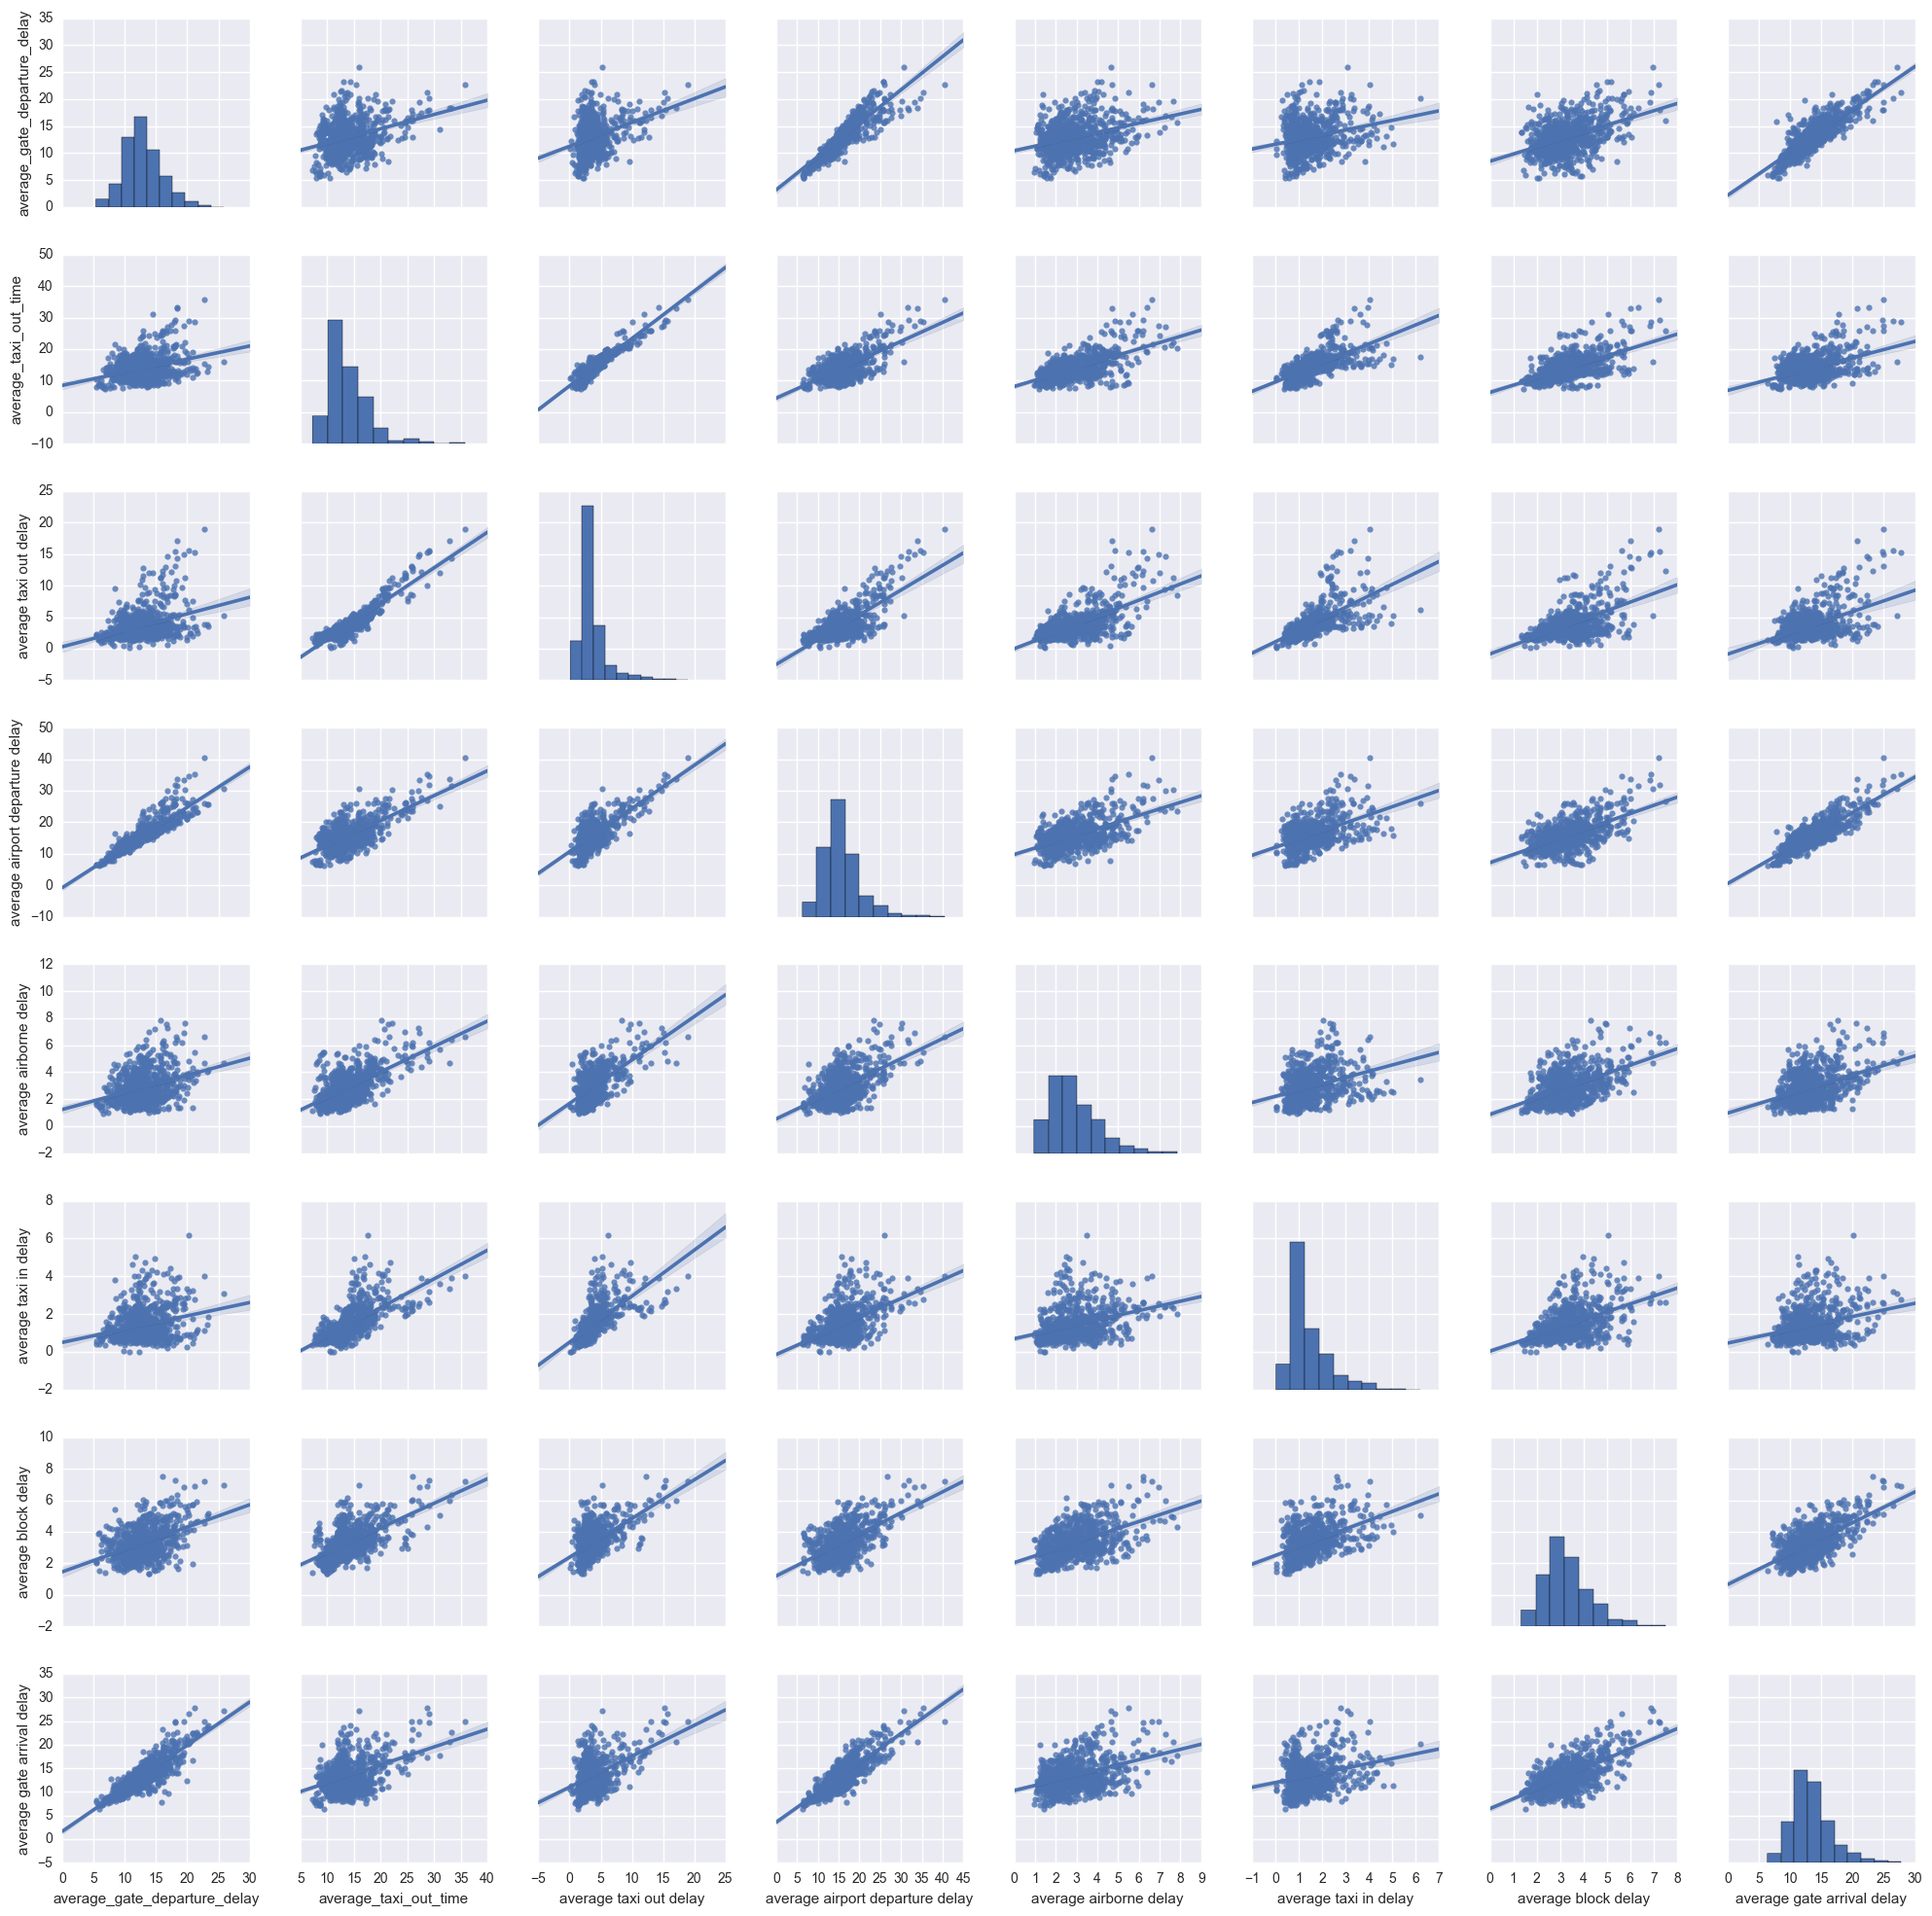

In [129]:
sns.pairplot(average, kind='reg')
plt.show()

In [130]:
average5=StandardScaler().fit_transform(average)

In [131]:
average_pca=PCA(n_components=8)
average2=average_pca.fit_transform(average5)

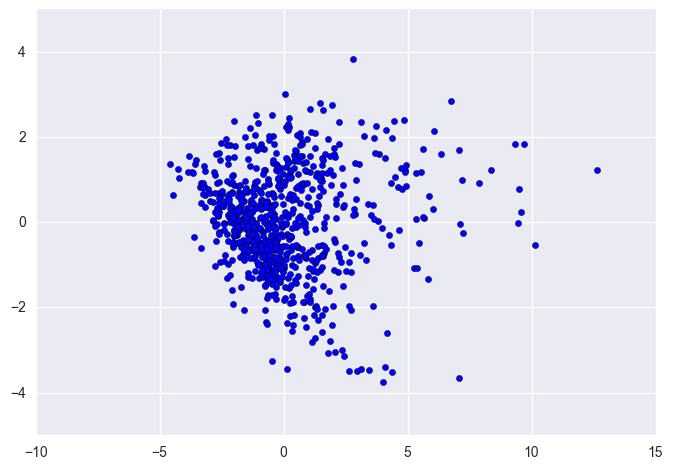

In [132]:
plt.scatter(average2.T[0], average2.T[1])

In [133]:
tsne2=TSNE(n_components=8)
tsne3=tsne2.fit_transform(average2)

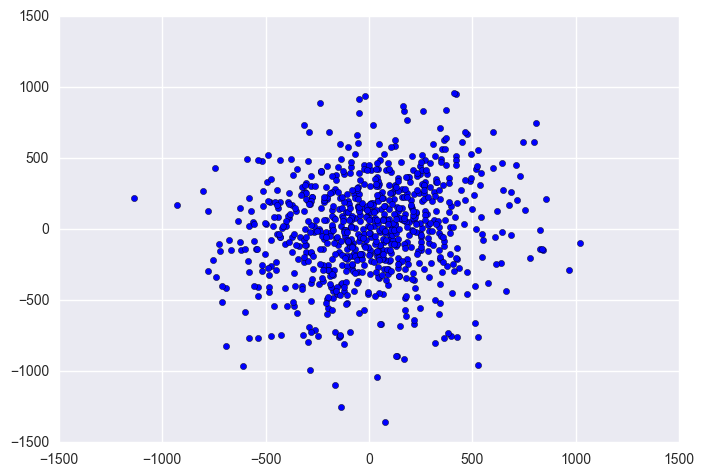

In [134]:
plt.scatter(tsne3[:,0], tsne3[:,1])

In [135]:
average_pca2=PCA(n_components=8)
average3=average_pca2.fit_transform(tsne3)

In [136]:
sum(average_pca2.explained_variance_ratio_)

0.99999999999999989

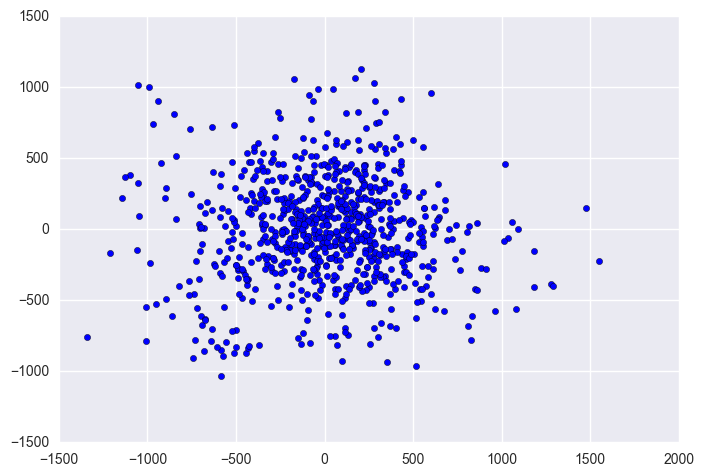

In [137]:
plt.scatter(average3.T[0], average3.T[1])

In [141]:
average_components=average_pca2.components_

In [143]:
confidence_components=average_components[0]

In [150]:
average=(average-average.mean())/average.std()

In [151]:
average_ratings=average.ix[0, :]
average_ratings

average_gate_departure_delay      -0.826699
average_taxi_out_time             -1.046414
average taxi out delay            -0.536208
average airport departure delay   -0.825693
average airborne delay            -0.355235
average taxi in delay             -0.683460
average block delay               -0.748858
average gate arrival delay        -0.786928
Name: 0, dtype: float64

In [152]:
average3[0,:]

array([   7.03682125,  102.82150315,  356.88786749, -578.08685985,
         85.7086818 , -225.9153029 , -148.97502719, -237.04889146])

In [153]:
pc1=pd.DataFrame({'average_rate':average_ratings.values},
                index=average.columns)
pc1

,average_rate
average_gate_departure_delay,-0.826699
average_taxi_out_time,-1.046414
average taxi out delay,-0.536208
average airport departure delay,-0.825693
average airborne delay,-0.355235
average taxi in delay,-0.683460
average block delay,-0.748858
average gate arrival delay,-0.786928


In [154]:
pc1['confidence_weights']=confidence_components
pc1

,average_rate,confidence_weights
average_gate_departure_delay,-0.826699,-0.097312
average_taxi_out_time,-1.046414,-0.218262
average taxi out delay,-0.536208,-0.049344
average airport departure delay,-0.825693,0.111009
average airborne delay,-0.355235,-0.171234
average taxi in delay,-0.683460,-0.515603
average block delay,-0.748858,-0.082533
average gate arrival delay,-0.786928,-0.791300


In [155]:
pc1['values']=pc1['average_rate']*pc1['confidence_weights']
pc1

,average_rate,confidence_weights,values
average_gate_departure_delay,-0.826699,-0.097312,0.080448
average_taxi_out_time,-1.046414,-0.218262,0.228392
average taxi out delay,-0.536208,-0.049344,0.026459
average airport departure delay,-0.825693,0.111009,-0.091660
average airborne delay,-0.355235,-0.171234,0.060828
average taxi in delay,-0.683460,-0.515603,0.352394
average block delay,-0.748858,-0.082533,0.061806
average gate arrival delay,-0.786928,-0.791300,0.622696


## After going through the data, I have found that the major reasons for delays have to do with the gate arrival delay. This had the biggest impact in peoples delays more so than anything else.